In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")
data_save = pd.read_csv("gender_submission.csv")

In [4]:
data_test.shape, data_save.shape, data_train.shape

((418, 11), (418, 2), (891, 12))

In [5]:
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# I. Анализ данных

### 1. Просмотрим на кол-во пропусков

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
data_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [9]:
new_data_train = data_train.copy()
new_data_test = data_test.copy()
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Заменим все NaN-ы в колонки "Age" на среднее значение этой колонки

In [10]:
mean_age = int(new_data_train.Age.mean())
new_data_train["Age"] = new_data_train["Age"].fillna(mean_age)
new_data_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q


In [11]:
mean_age = int(new_data_test.Age.mean())
new_data_test["Age"] = new_data_test["Age"].fillna(mean_age)
new_data_test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [12]:
new_data_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
new_data_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

### 3. Удалим не нужную колонку "Ticket"

Эта колонка не несет в себе полезной информации - просто номер билета

In [14]:
new_data_train = new_data_train.drop(columns=['Ticket'])
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [15]:
new_data_test = new_data_test.drop(columns=['Ticket'])
new_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


### 4. Заменим в колонке "Sex" значение "male" на 1, а значение "female" - на 0

In [16]:
new_data_train = new_data_train.replace("male", 1).replace("female", 0)
new_data_test = new_data_test.replace("male", 1).replace("female", 0)
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


### 5. Оставим в колонке "Cabin" только первую букву, остальные значения заполним усредненно

In [17]:
new_data_train.Cabin = new_data_train.Cabin.str.slice(0, 1)
new_data_test.Cabin = new_data_test.Cabin.str.slice(0, 1)

In [18]:
new_data_train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [19]:
new_data_test.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [20]:
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


Фун-ия генерирует рандомное значение (кабинки), учитывая заранее известные значения (с весами)

In [21]:
# x - numpy array
def random_index_with_probabilities(x):
    n = x.sum()

    # Вероятности
    p = np.array([v * (v / n) for v in x])
    
    # Нормализация
    p /= p.sum() 
    
    # Возращаем рандомное значение, учитывая вероятноти
    # np.random.choice(len(x), 1, p=p) - numpy array с одним значением, кастуем к int с помощью sum()
    return np.random.choice(len(x), 1, p=p).sum()

# Первое значение не учитываем, т. к. оно NaN
x = new_data_train.Cabin.value_counts().values[1:]
print(x)
for _ in range(100):
    print(random_index_with_probabilities(x), end=", ")

[47 33 32 15 13  4  1]
0, 2, 0, 1, 0, 0, 2, 3, 2, 0, 3, 1, 2, 2, 1, 0, 3, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 3, 1, 2, 3, 0, 0, 2, 0, 0, 4, 2, 4, 0, 3, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 3, 2, 1, 0, 0, 0, 3, 0, 2, 2, 0, 1, 1, 4, 1, 1, 3, 2, 0, 2, 0, 2, 0, 2, 1, 4, 0, 2, 3, 2, 0, 0, 0, 

Заменим все буквенные значения кабинок на цифры. Nan-ы перешли в цифру "8"

In [22]:
LE = LabelEncoder()
new_data_train["Cabin"] = LE.fit_transform(new_data_train["Cabin"])
new_data_test["Cabin"] = LE.fit_transform(new_data_test["Cabin"])
new_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,8,S


Если значение поле 8, т. е. Nan, мы генерируем новое значение кабинки, в противном случае - оставляем значение

In [23]:
x = new_data_train.Cabin.value_counts().values[1:]
new_column = [random_index_with_probabilities(x) if value == 8 else value for value in new_data_train.Cabin]

new_data_train["Cabin"] = new_column
new_data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,4,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,1,C


In [24]:
new_data_test.Cabin.value_counts()

7    327
2     35
1     18
3     13
4      9
5      8
0      7
6      1
Name: Cabin, dtype: int64

In [25]:
x = new_data_test.Cabin.value_counts().values[1:]
new_column = [random_index_with_probabilities(x) if value == 7 else value for value in new_data_test.Cabin]

new_data_test["Cabin"] = new_column
new_data_test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,4,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,9.2250,0,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,7.6292,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,29.0000,0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,7.2292,2,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,24.1500,2,S


### 7. Заменим в колонке "Embarked" буквенные значения на цифры

In [26]:
new_data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
new_data_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [28]:
new_data_train.Embarked.isna().mean(), new_data_test.Embarked.isna().mean()

(0.002244668911335578, 0.0)

Значения NaN перешли в "3"

In [29]:
new_data_train["Embarked"] = LE.fit_transform(new_data_train["Embarked"])
new_data_test["Embarked"] = LE.fit_transform(new_data_test["Embarked"])
new_data_train.Embarked.value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [30]:
x = new_data_train.Embarked.value_counts().values[:-1]
new_column = [random_index_with_probabilities(x) if value == 3 else value for value in new_data_train.Embarked]

new_data_train["Embarked"] = new_column
new_data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,8.4583,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,4,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,1,0


### 8. Удалим колонку "Name"


In [31]:
new_data_train = new_data_train.drop(columns=['Name'])
new_data_test = new_data_test.drop(columns=['Name'])
new_data_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,1,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


In [32]:
new_data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,1,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


### 9. Заполним NaN-ы в тестовом датасете в колонке "Fare"

In [33]:
new_data_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Fare           0.002392
Cabin          0.000000
Embarked       0.000000
dtype: float64

In [34]:
mean_fare = int(new_data_test.Fare.mean())
new_data_test["Fare"] = new_data_test["Fare"].fillna(mean_fare)
new_data_test.head(6)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,0,1
1,893,3,0,47.0,1,0,7.0000,0,2
2,894,2,1,62.0,0,0,9.6875,4,1
3,895,3,1,27.0,0,0,8.6625,1,2
4,896,3,0,22.0,1,1,12.2875,0,2
5,897,3,1,14.0,0,0,9.2250,0,2


### 10. Построим матрицу корреляции

Text(0.5, 1.0, 'Матрица корреляции')

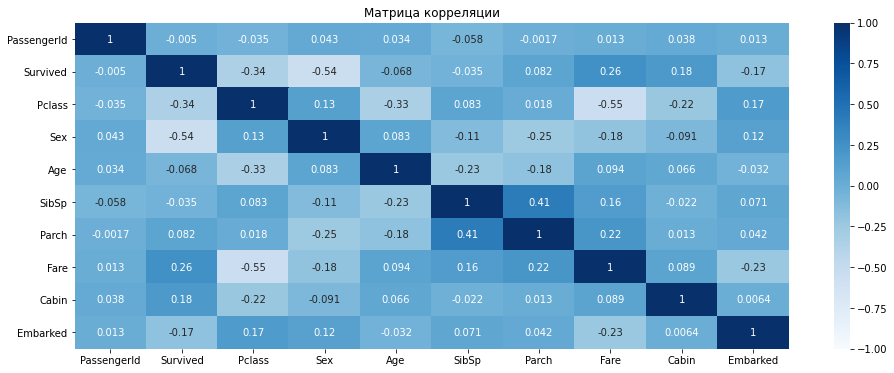

In [35]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(new_data_train.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

heatmap.set_title("Матрица корреляции")

Из этой таблицы следует, что использовать линейные модели для предсказания выживания, скорее всего, будет не оптимально. Т.к. значения целевой переменной (Survived) очень близки к нулю.

# II. Машинное обучение 

### 1. Модели МО

In [36]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, make_scorer, roc_auc_score, roc_curve, auc

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
class MyLinearRegression:
    # fit_intercept=True, если мы учитываем фиктивную 1. fit_intercept=False, если не учитываем
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    # Принимает на вход X, y и вычисляет веса по данной выборке
    def fit(self, X, y):
        n, k = X.shape
        
        X_train = X
        
        # Если данные смещены
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        # Минимизация ошибки по методу наименьших квадратов
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self
    
    # Принимает на вход X и возвращает ответы модели
    def predict(self, X):
        n, k = X.shape
        
        # Если данные смещены
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def get_weights(self):
        return self.w

### 2. Разделим данные для обучения

In [40]:
# Данные для обучения
X_train = new_data_train.drop("Survived", axis=1).values
y_train = new_data_train["Survived"]

# Данные для тестирования
X_test = new_data_test.values
y_test = data_save["Survived"]

### 3. Метрики и первичное обучение

In [41]:
def metrics(y_preds, y):
    return f'R^2: {r2_score(y_preds, y)}', f'MSE: {mean_squared_error(y_preds, y)}'

Для начала установим гиперпараметры ручками и посмотрим на метрики (R^2 и MSE)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
linearRegression = LinearRegression()
myLinearRegression = MyLinearRegression()

Обучение моделей

In [43]:
knn.fit(X_train, y_train)
linearRegression.fit(X_train, y_train)
myLinearRegression.fit(X_train, y_train)

Предсказание моделей

In [44]:
knn_predict = knn.predict(X_test)
lr_predict = linearRegression.predict(X_test)
my_lr_predict = myLinearRegression.predict(X_test)

In [45]:
print("KNN:", metrics(knn_predict, y_test), accuracy_score(knn_predict, y_test))
print("LinearRegression:", metrics(lr_predict, y_test))
print("MyLinearRegression:", metrics(my_lr_predict, y_test))

KNN: ('R^2: -2.2828979003045364', 'MSE: 0.35167464114832536') 0.6483253588516746
LinearRegression: ('R^2: 0.16541297305701652', 'MSE: 0.07538145235701034')
MyLinearRegression: ('R^2: 0.16541297305698965', 'MSE: 0.0753814523570113')


### 4. Кросс-валидация + подбор гиперпараметров

Подберем гиперпараметры для KNN

In [46]:
knn_grid = {"n_neighbors": [x for x in range(2, 30)],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "metric": ["manhattan", "euclidean"]
           }
best_knn = GridSearchCV(KNeighborsClassifier(), 
                               knn_grid,
                               cv=5,
                               verbose=3)
best_knn.fit(X_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.615 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.399 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.618 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.567 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.626 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.416 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.596 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [47]:
best_knn.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 26,
 'weights': 'uniform'}

Подберем гиперпараметры для линейной регрессии

In [48]:
lr_grid = {"fit_intercept": [True, False],
           "normalize": [True, False],
           "n_jobs": [-1, 1, 2],
           "positive": [True, False]
           }
best_lr = GridSearchCV(LinearRegression(), 
                               lr_grid,
                               cv=5,
                               verbose=3)
best_lr.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=True;, score=-0.017 total time=   0.0s
[CV 2/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=True;, score=0.088 total time=   0.0s
[CV 3/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=True;, score=0.050 total time=   0.0s
[CV 4/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=True;, score=0.122 total time=   0.0s
[CV 5/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=True;, score=0.143 total time=   0.0s
[CV 1/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=False;, score=0.338 total time=   0.0s
[CV 2/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=False;, score=0.361 total time=   0.0s
[CV 3/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=False;, score=0.393 total time=   0.0s
[CV 4/5] END fit_intercept=True, n_jobs=-1, normalize=True, positive=False;, s

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1, 1, 2],
                         'normalize': [True, False],
                         'positive': [True, False]},
             verbose=3)

In [49]:
best_lr.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'normalize': True, 'positive': False}

In [50]:
best_knn_predict = best_knn.predict(X_test)
best_lr_predict = best_lr.predict(X_test)

### 5. Итоги

In [51]:
print("KNN algoritms:")
print("KNN:", metrics(knn_predict, y_test), accuracy_score(knn_predict, y_test))
print("Best KNN:", metrics(best_knn_predict, y_test), accuracy_score(best_knn_predict, y_test))

print("\n\nLinearRegression algoritms:")
print("LinearRegression:", metrics(lr_predict, y_test))
print("MyLinearRegression:", metrics(my_lr_predict, y_test))
print("Best LinearRegression:", metrics(best_lr_predict, y_test))

KNN algoritms:
KNN: ('R^2: -2.2828979003045364', 'MSE: 0.35167464114832536') 0.6483253588516746
Best KNN: ('R^2: -3.4377545084351357', 'MSE: 0.3492822966507177') 0.6507177033492823


LinearRegression algoritms:
LinearRegression: ('R^2: 0.16541297305701652', 'MSE: 0.07538145235701034')
MyLinearRegression: ('R^2: 0.16541297305698965', 'MSE: 0.0753814523570113')
Best LinearRegression: ('R^2: 0.16541297305701153', 'MSE: 0.07538145235701024')


Линейная регрессия (любой из 3-х) работает чуть-чуть лучше, чем KNN

# III. Дополнительно. Модели МО

### 1. Дерево решений

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
grid_tree = {"criterion": ["gini", "entropy"],
             "max_depth": np.arange(3, 20),
             "splitter": ["best", "random"],
             "random_state": [322]}

best_tree = GridSearchCV(DecisionTreeClassifier(),
                         grid_tree,
                         cv=5,
                         verbose=3)
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV 1/5] END criterion=gini, max_depth=3, random_state=322, splitter=best;, score=0.687 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, random_state=322, splitter=best;, score=0.815 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, random_state=322, splitter=best;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, random_state=322, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, random_state=322, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, random_state=322, splitter=random;, score=0.765 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, random_state=322, splitter=random;, score=0.820 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, random_state=322, splitter=random;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, random_state=322, splitter=random;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [322],
                         'splitter': ['best', 'random']},
             verbose=3)

In [54]:
best_tree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'random_state': 322,
 'splitter': 'random'}

In [55]:
best_tree_predict = best_tree.predict(X_test)

In [56]:
accuracy_score(y_test, best_tree_predict)

0.916267942583732

### 2. Случайный лес

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
grid_random_forest = {"criterion": ["gini", "entropy"],
             "max_depth": np.arange(3, 20),
             "n_estimators": np.arange(100, 500, 100),
             "random_state": [322]}

best_random_forest = GridSearchCV(RandomForestClassifier(),
                         grid_random_forest,
                         cv=5,
                         verbose=3)
best_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 136 candidates, totalling 680 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=322;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=322;, score=0.820 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=322;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=322;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100, random_state=322;, score=0.831 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=200, random_state=322;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=200, random_state=322;, score=0.820 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=200, random_state=322;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=20

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([100, 200, 300, 400]),
                         'random_state': [322]},
             verbose=3)

In [59]:
best_random_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'n_estimators': 400,
 'random_state': 322}

In [60]:
best_random_forest_predict = best_random_forest.predict(X_test)

In [61]:
accuracy_score(best_random_forest_predict, y_test)

0.8349282296650717

### 3. Итоги

In [62]:
print("Random forest:", metrics(best_random_forest_predict, y_test), accuracy_score(best_random_forest_predict, y_test))
print("Desicion tree:", metrics(best_tree_predict, y_test), accuracy_score(y_test, best_tree_predict))

Random forest: ('R^2: 0.2450726344719275', 'MSE: 0.16507177033492823') 0.8349282296650717
Desicion tree: ('R^2: 0.627972027972028', 'MSE: 0.08373205741626795') 0.916267942583732


### IV Дополнительно. Ансамбли. Бустинг

### 1. LightGBM

In [63]:
import lightgbm as lgb

In [64]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [65]:
params={}
params['learning_rate']=0.07
params['boosting_type']='gbdt' # GradientBoostingDecisionTree
params['objective']='binary' # задача
params['metric']='auc' 
params['max_depth']=10

In [66]:
gbm = lgb.train(params, lgb_train,
            num_boost_round=100,
            valid_sets=[lgb_train, lgb_eval],
            early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[1]	training's auc: 0.910297	valid_1's auc: 0.923476
Trai

In [67]:
gbm_predict = gbm.predict(X_test)

In [68]:
roc = roc_auc_score(y_test, gbm_predict)
roc

0.9461317768104471

In [69]:
mean_squared_error(gbm_predict, y_test)

0.12625485473467868

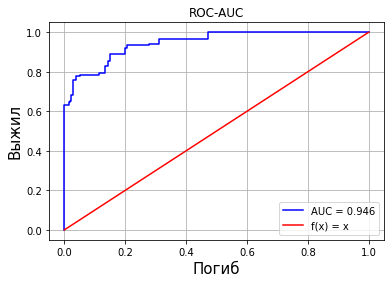

In [71]:
fpr, tpr, threshold = roc_curve(y_true=y_test.values, 
                                        y_score=gbm_predict, 
                                        pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('ROC-AUC')
plt.plot(fpr, tpr, c='b', label='AUC = '+ str(np.round(roc_auc, 3)))
plt.plot([0, 1], [0, 1], c='r', label="f(x) = x")
plt.xlabel('Погиб', fontsize=15)
plt.ylabel('Выжил', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Результат

In [72]:
models_mse = {
    "KNN": round(mean_squared_error(best_knn_predict, y_test), 3), 
    "LinReg": round(mean_squared_error(best_lr_predict, y_test), 3),
    "Random Forest": round(mean_squared_error(best_random_forest_predict, y_test), 3), 
    "Decision Tree": round(mean_squared_error(best_tree_predict, y_test), 3),
    "LGB": round(mean_squared_error(gbm_predict, y_test), 3)  
}

models_roc = {
    "KNN": round(roc_auc_score(best_knn_predict, y_test), 3), 
    "LinReg": "",
    "Random Forest": round(roc_auc_score(best_random_forest_predict, y_test), 3), 
    "Decision Tree": round(roc_auc_score(best_tree_predict, y_test), 3),
    "LGB": round(roc_auc_score(y_test, gbm_predict), 3)
}

print("Model:          MSE       ROC-AUC")
for key in dict(sorted(models_mse.items(), key=lambda models_mse: models_mse[1])):
    print(key + ": " + " " * (len("Decision Tree") - len(key)), models_mse[key], end="     ")
    print(models_roc[key])

Model:          MSE       ROC-AUC
LinReg:         0.075     
Decision Tree:  0.084     0.915
LGB:            0.126     0.946
Random Forest:  0.165     0.828
KNN:            0.349     0.62
